In [1]:
sessionInfo()

R version 4.3.3 (2024-02-29)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Red Hat Enterprise Linux 8.10 (Ootpa)

Matrix products: default
BLAS/LAPACK: /scratch/gpfs/KANG/hirak/mambaforge/envs/r43/lib/libopenblasp-r0.3.23.so;  LAPACK version 3.11.0

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

time zone: America/New_York
tzcode source: system (glibc)

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

loaded via a namespace (and not attached):
 [1] digest_0.6.35   IRdisplay_1.1   utf8_1.2.4      base64enc_0.1-3
 [5] fastmap_1.1.1   glue_1.7.0      htmltools_0.5.7 repr_1.1.6     
 [9] lifecycle_1.0.4 cli_3.6.2       

In [2]:
suppressPackageStartupMessages({
  library(Seurat)
  library(dplyr)
  library(ggplot2)
  library(scCustomize)
  library(scater)
    library(RColorBrewer)
    library(data.table)
    library(stringr)
library(tibble)
    library(tidyr)
    library(scDblFinder)
    library(scCustomize)
    library(cowplot)
library(patchwork)
})

In [3]:
fig.size <- function (height, width, res=300) {
    options(repr.plot.height = height, repr.plot.width = width, resolution=res)
}

## Load Data

In [5]:
homo = readRDS(
    glue::glue(
            '../seurat_objects/',
            'homozygous.rds'
        )
)
hemi = readRDS(
    glue::glue(
            '../seurat_objects/',
            'hemizygous.rds'
        )
)
tumor.int = readRDS('../seurat_objects/dong_et_al_tumor.rds')

human_meta = read.csv('../seurat_metadata/dong_et_al_tumor_metadata.csv')
homo_meta = read.csv('../seurat_metadata/homozygous_metadata.csv')
hemi_meta = read.csv('../seurat_metadata/hemizygous_metadata.csv')
hemi@meta.data$annot.new = hemi_meta$annot.new
homo@meta.data$annot.new = homo_meta$annot.new
all_cell_types = union(union(
   unique(tumor.int$annot),
   unique(homo$annot.new)
    ),
   unique(hemi$annot.new)
)
color.list = ggthemes::tableau_color_pal('Tableau 20')(20)
#color.list = hue_pal()(15)
names(color.list) = all_cell_types

## Figure 1C Homozygous TH-MYCN (n=5) Hemizygous TH-MYCN (n=5)

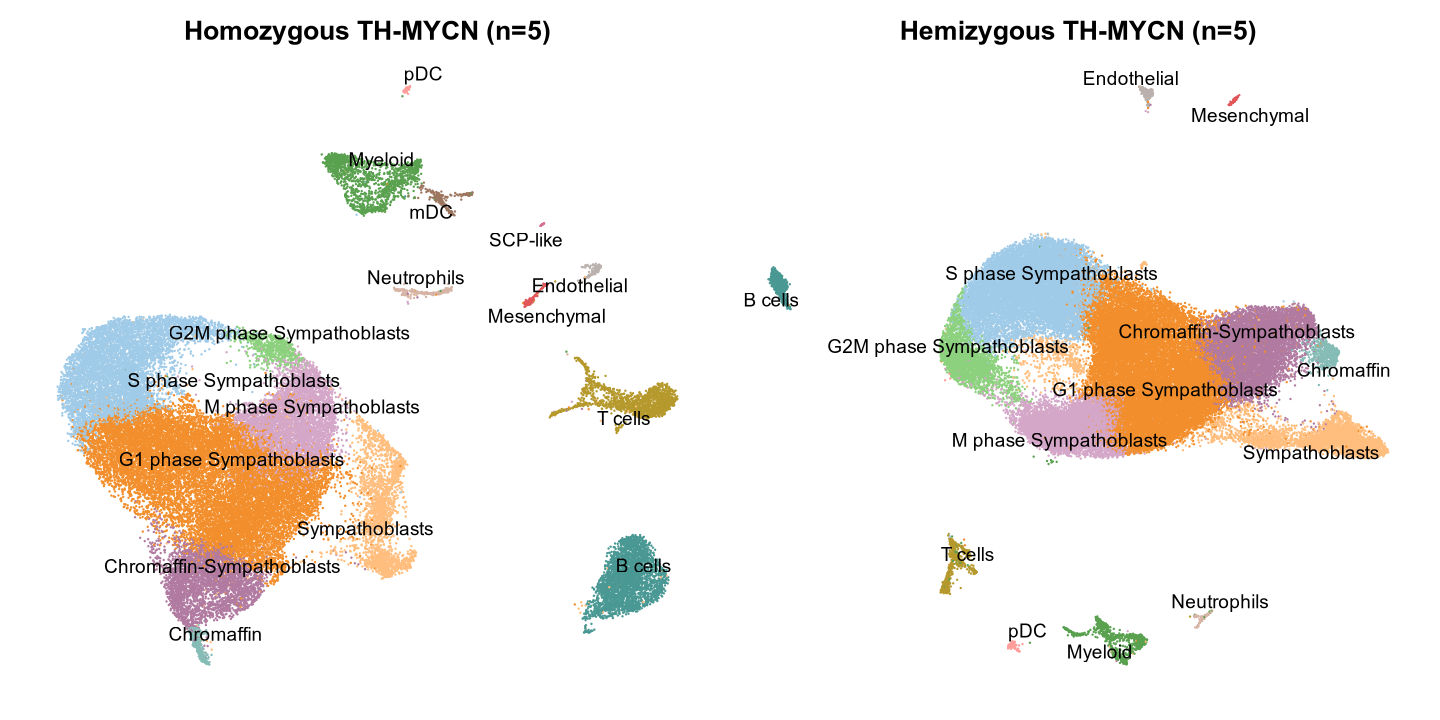

In [5]:
fig.size(6,12)

p.homo = DimPlot(homo, label=T, reduction="umap", group.by="annot.new",repel = T)+scale_color_manual(values = color.list) + ggtitle("Homozygous TH-MYCN (n=5)") + NoAxes() + NoLegend()
p.hemi = DimPlot(hemi, label=T, reduction="umap", group.by="annot.new",repel=T)+scale_color_manual(values = color.list) + ggtitle("Hemizygous TH-MYCN (n=5)") + NoAxes() + NoLegend()
p.homo | p.hemi

## Figure 1E

In [6]:
dotplot.sig.df = openxlsx::read.xlsx(
    '../spread_sheets/homozygous_dotplot.xlsx',
    sheet ="Dotplot"
)
homo$annot = factor(
    homo$annot, levels=na.omit(dotplot.sig.df$Annotation)) 

In [7]:
dotplot.sig.df.hemi = openxlsx::read.xlsx(
    '../spread_sheets/hemizygous_dotplot.xlsx', sheet = 'Dotplot'
)
hemi$annot = factor(
    hemi$annot, levels=na.omit(dotplot.sig.df.hemi$Annotation)) 

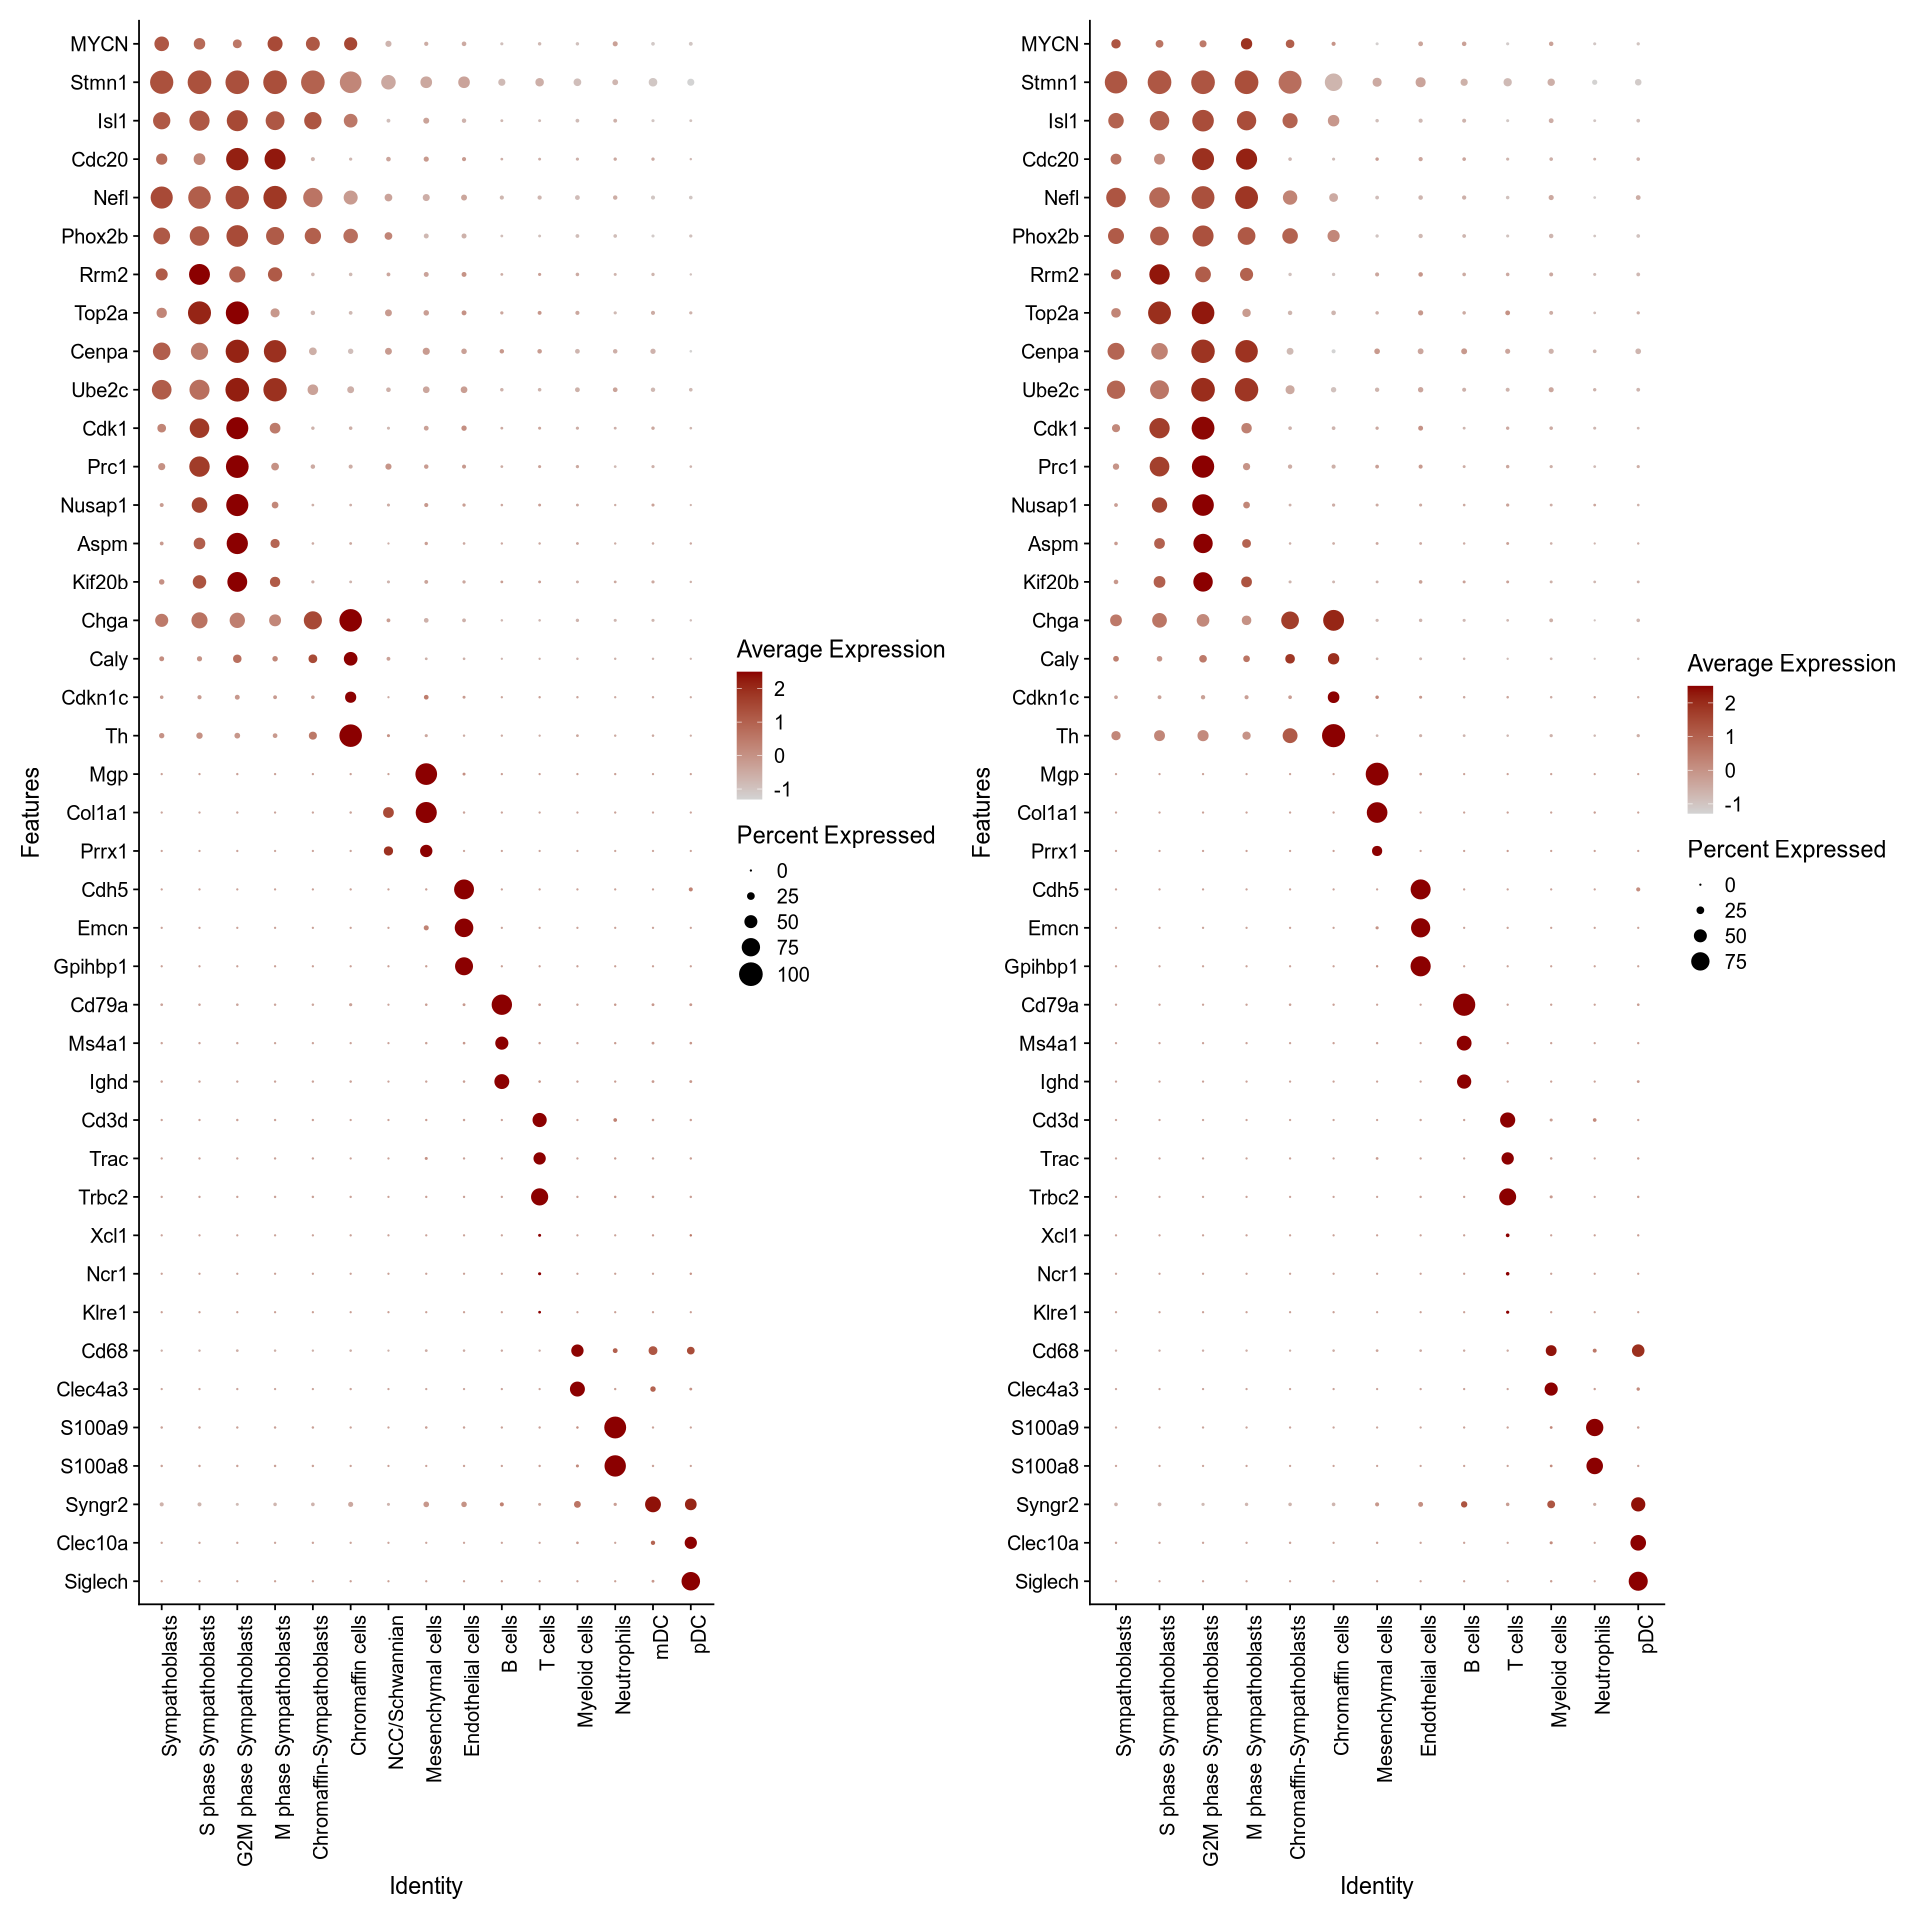

In [8]:
fig.size(16,16)
l1 = DotPlot(
        homo, 
        assay='RNA',
        features = dotplot.sig.df$Gene %>% rev,
        group.by='annot', 
        cols = c("lightgrey", "darkred"))+
         coord_flip()+theme(axis.text.x = element_text(angle = 90, hjust = 1))

l2 = DotPlot(
        hemi, 
        assay='RNA',
        features = dotplot.sig.df.hemi$Gene %>% rev,
        group.by='annot', 
        cols = c("lightgrey", "darkred"))+
         coord_flip()+theme(axis.text.x = element_text(angle = 90, hjust = 1))

l1 | l2

## Figure 1D

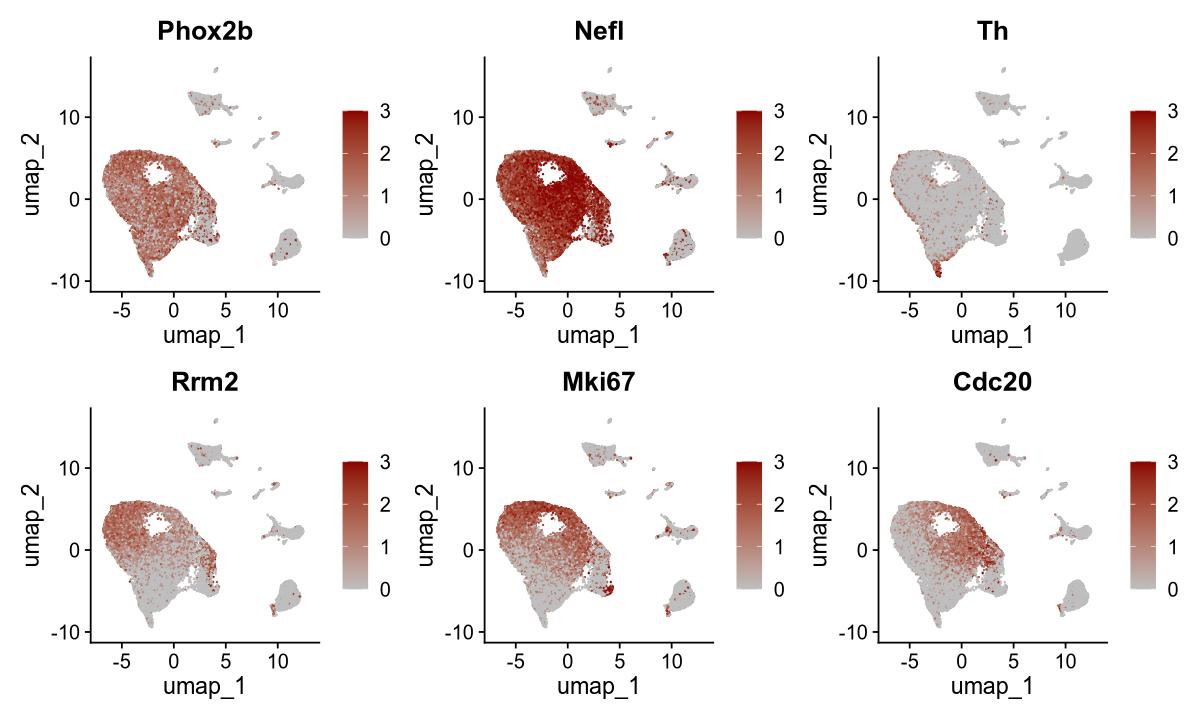

In [9]:
fig.size(6,10)
genes = c("Phox2b", "Nefl", "Th", "Rrm2", "Mki67", "Cdc20")
feat_plot = FeaturePlot(
    homo, 
    ncol=3,
    reduction = "umap",
    cols = c("grey", "darkred"),
    min.cutoff = 0,
    max.cutoff = 3,
    features = genes)
feat_plot

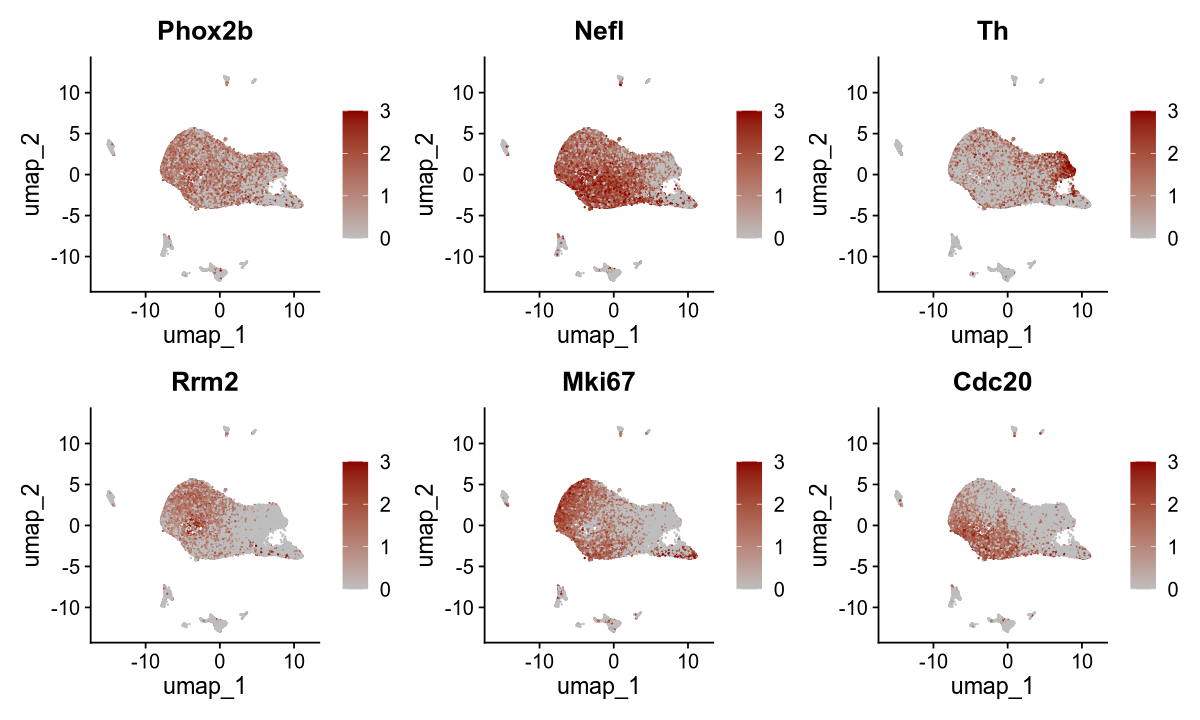

In [10]:
fig.size(6,10)
genes = c("Phox2b", "Nefl", "Th", "Rrm2", "Mki67", "Cdc20")
feat_plot = FeaturePlot(
    hemi, 
    ncol=3,
    reduction = "umap",
    cols = c("grey", "darkred"),
    min.cutoff = 0,
    max.cutoff = 3,
    features = genes)
feat_plot

## Figure 3A

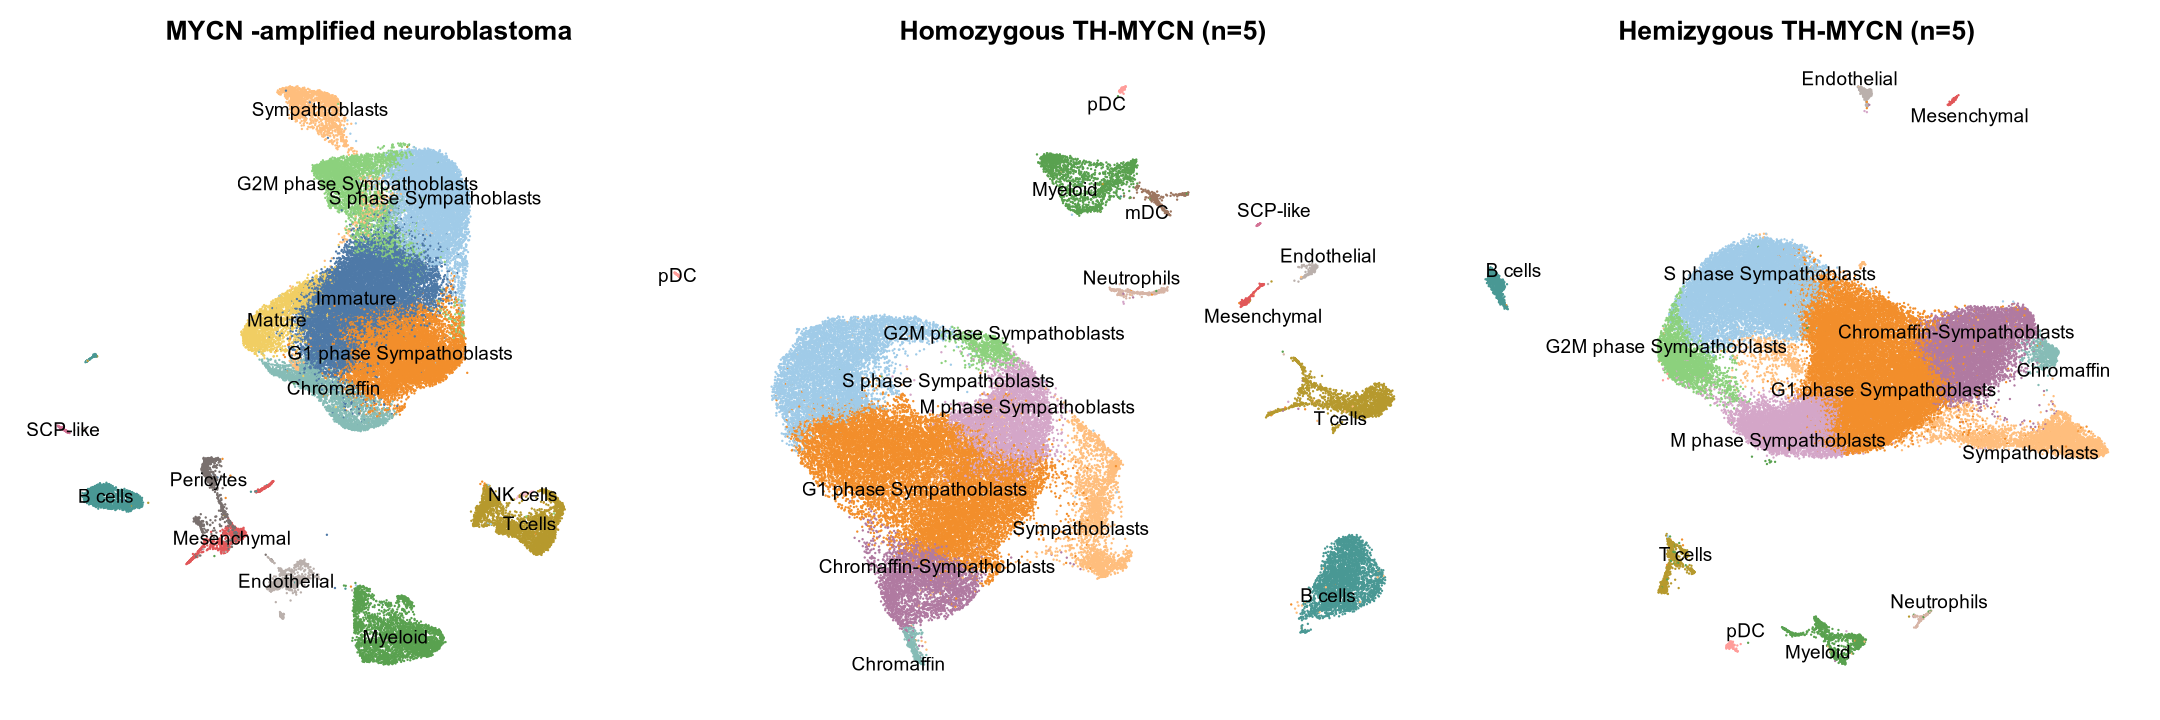

In [12]:
fig.size(6,18)

p.hs = DimPlot(tumor.int, label = T, reduction = "umap", 
               group.by = "annot")+labs(title="MYCN -amplified neuroblastoma") +scale_color_manual(values = color.list) + NoAxes()+ NoLegend()

p.homo = DimPlot(homo, label=T, reduction="umap", group.by="annot.new",repel = T)+scale_color_manual(values = color.list) + ggtitle("Homozygous TH-MYCN (n=5)") + NoAxes() + NoLegend()
p.hemi = DimPlot(hemi, label=T, reduction="umap", group.by="annot.new",repel=T)+scale_color_manual(values = color.list) + ggtitle("Hemizygous TH-MYCN (n=5)") + NoAxes() + NoLegend()
p.hs | p.homo | p.hemi

In [13]:
tumor.int@meta.data$annot.new = tumor.int@meta.data$annot

In [14]:
tumor.int@meta.data$species = 'human'
hemi@meta.data$species = "hemi"
homo@meta.data$species = "homo"

In [15]:
whole.meta = rbind(
    tumor.int@meta.data %>% select(c('species', 'annot.new')),
    hemi@meta.data %>% select(c('species', 'annot.new')),
    homo@meta.data %>% select(c('species', 'annot.new'))
) 

In [16]:
whole.meta$annot.new = as.factor(whole.meta$annot.new)

## Figure 3B

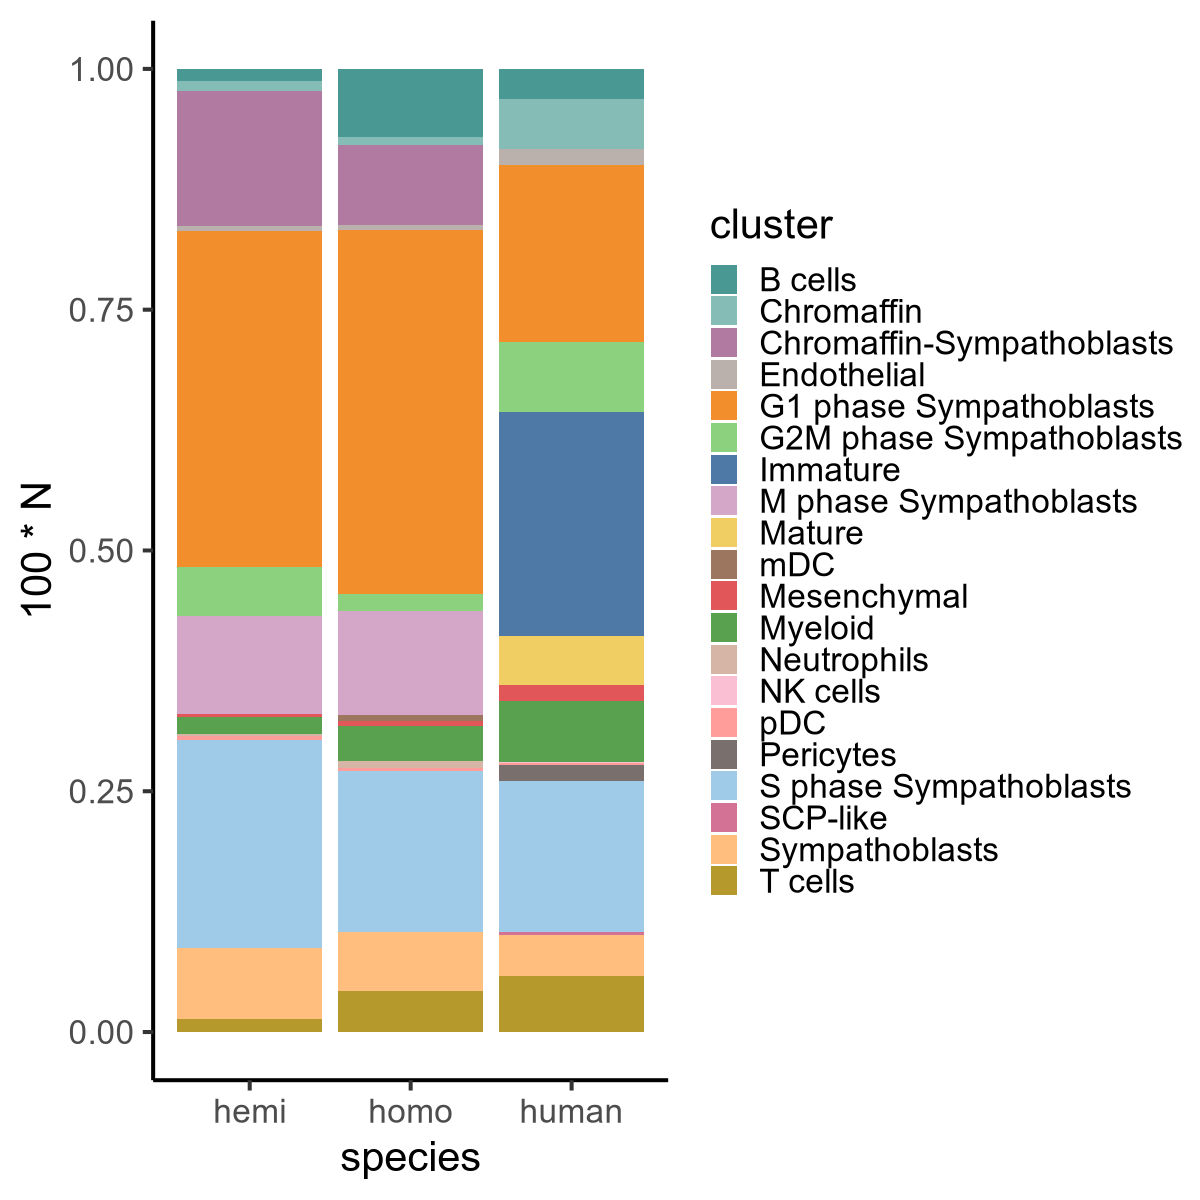

In [17]:
fig.size(10,10)
box.stacked.plot = whole.meta %>%
    with(prop.table(table( species, annot.new ), 1)) %>%
    data.table() %>%
    mutate(cluster = annot.new) %>%
    ggplot(aes(species, 100*N, fill = cluster)) +
    geom_bar(stat = 'identity', position = position_fill()) +
    scale_fill_manual(values = color.list) +
    theme_test(base_size = 25) +
    theme(
        panel.border = element_blank(),  # Remove the border around the panel
        axis.line.x = element_line(),     # Keep the x-axis line
        axis.line.y = element_line(),     # Keep the y-axis line
        axis.line = element_line(color = "black")  #
    )
box.stacked.plot

## Figure 3D

In [18]:
Idents(tumor.int) = "annot.new"
Idents(homo) = "annot.new"
Idents(hemi) = "annot.new"

In [20]:
sig_df = openxlsx::read.xlsx(
    '../Figure_3D_order.xlsx'
) 

In [36]:
homo_rearranged <- c('Sympathoblasts', 'G1 phase Sympathoblasts', 
                     'S phase Sympathoblasts', 'M phase Sympathoblasts', 
                     'G2M phase Sympathoblasts', 'Chromaffin-Sympathoblasts', 
                     'Chromaffin', 'SCP-like', 'Mesenchymal', 
                     'Endothelial','Neutrophils', 'mDC', 'B cells', 'T cells', 'Myeloid', 'pDC'
                     )
homo$annot.new = factor(
    homo$annot.new, levels=homo_rearranged)

In [28]:
hemi$annot.new = factor(
    hemi$annot.new, levels=homo_rearranged)

In [22]:
tumor.int$annot.new = factor(
    tumor.int$annot.new, levels=unique(sig_df$Identity))

In [39]:
phomo = DotPlot(
        homo, 
        assay='RNA',
        features = intersect(
                unique(sig_df$Features) %>% str_to_title,
                homo %>% rownames
                
            ) %>% rev, 
        group.by='annot.new', 
        cols = c("lightgrey", "darkred"))+
         coord_flip()+theme(
             axis.text.x = element_text(
                 angle = 90, hjust=1, vjust=0.5,
             size=17),
             axis.text.y = element_text(
             size=17)
         )
phemi = DotPlot(
        hemi, 
        assay='RNA',
        features = intersect(
                unique(sig_df$Features) %>% str_to_title,
                hemi %>% rownames
                
            ) %>% rev, 
        group.by='annot.new', 
        cols = c("lightgrey", "darkred"))+
         coord_flip()+theme(
             axis.text.x = element_text(
                 angle = 90, hjust=1, vjust=0.5,
             size=17),
             axis.text.y = element_text(
             size=17)
         )
longdotplot = DotPlot(
    tumor.int, 
        assay='RNA',
        features = unique(sig_df$Features) %>% rev, 
        group.by='annot.new', 
        cols = c("lightgrey", "darkred"))+
         coord_flip()+theme(
             axis.text.x = element_text(
                 angle = 90, hjust=1, vjust=0.5,
             size=17),
             axis.text.y = element_text(
             size=17)
         )

In [41]:
phomo_no_axis = phomo + theme(
    axis.text.y = element_blank(),  # Remove y-axis labels
         axis.title.y = element_blank(), # Remove y-axis title
    legend.position = "none"
)
phemi_no_axis = phemi + theme(
    axis.text.y = element_blank(),  # Remove y-axis labels
         axis.title.y = element_blank()  # Remove y-axis title
)

In [42]:
combined_plot <-  longdotplot + theme(legend.position="none") + phomo_no_axis + phemi_no_axis 
  plot_layout(guides = "collect") & 
  theme(legend.position = "right")

NULL

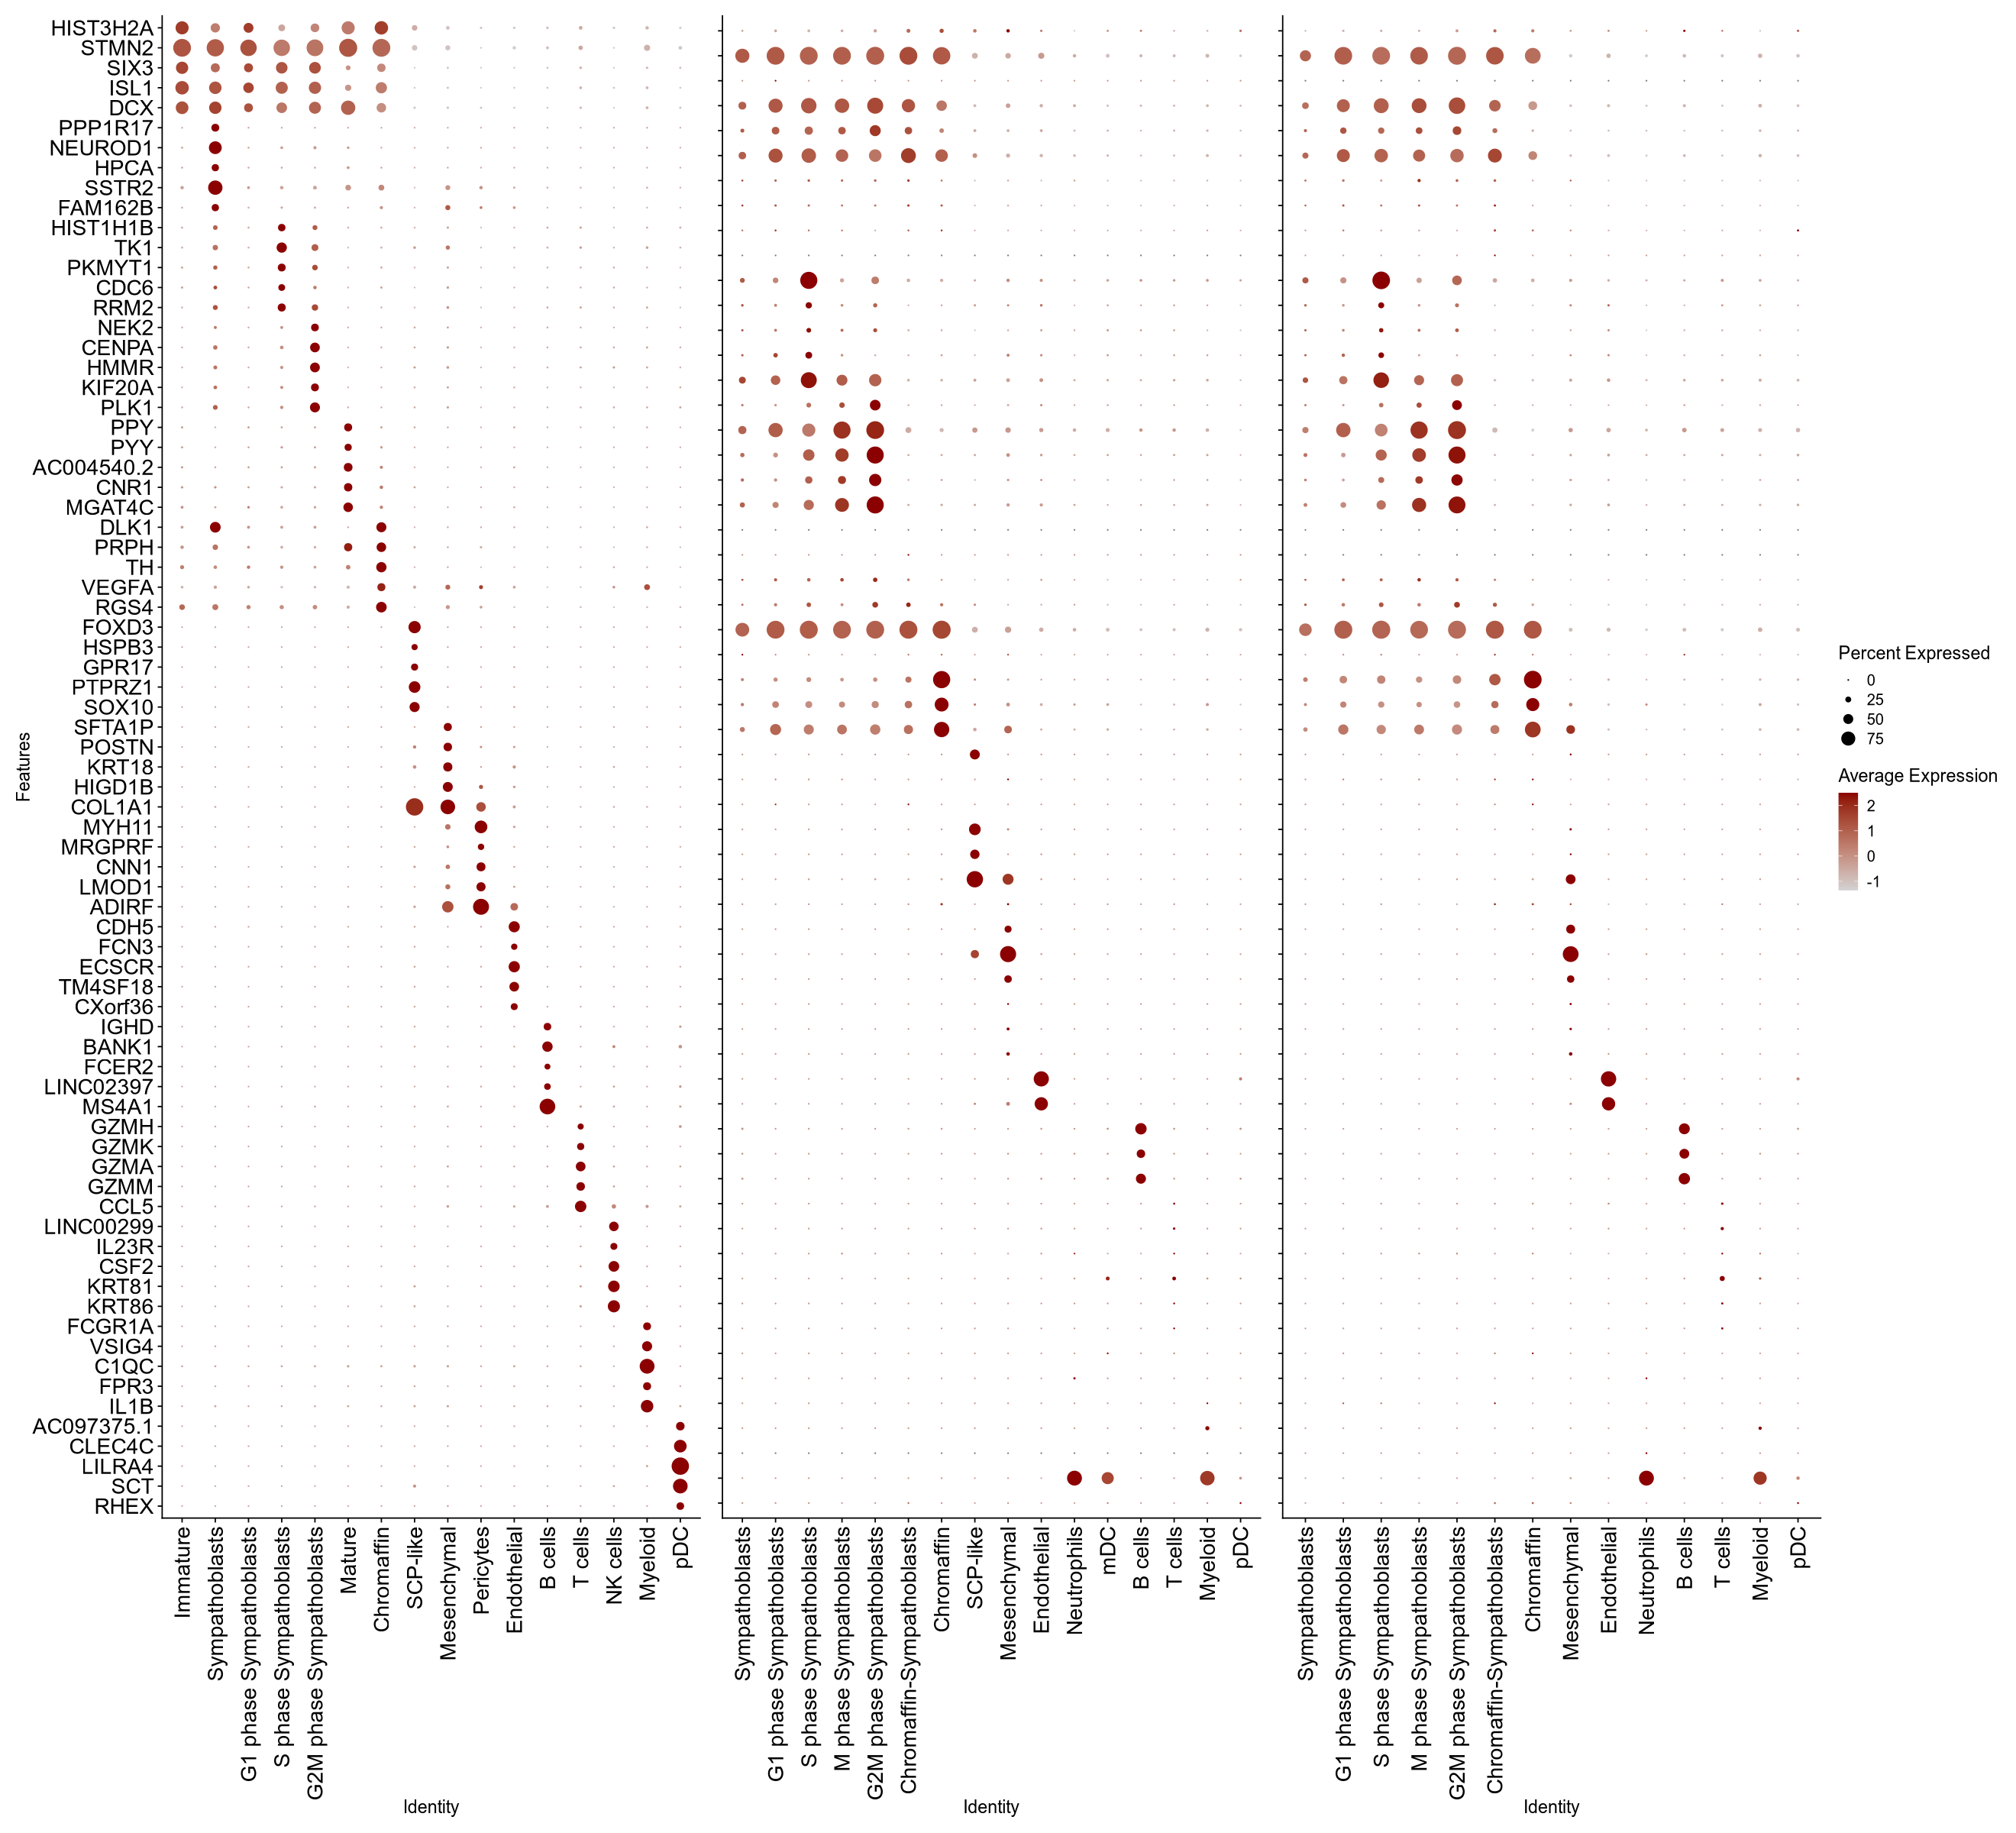

In [43]:
fig.size(20,22)
combined_plot

## Figure 3C

### Tumor integrated data

In [7]:
jensky_signature = openxlsx::read.xlsx(
    '../spread_sheets/dong_et_al_tumor_dotplot.xlsx'
)

In [8]:
gene_sets = split(jensky_signature$gene, jensky_signature$cluster)

In [9]:
tumor_int_scores = AddModuleScore(
    object = tumor.int,
    features = gene_sets[jensky_signature$cluster %>% unique],
    name = paste0('Jansky_',jensky_signature$cluster %>% unique)
)

Warning message:
“The following features are not present in the object: RP11-308N19.1, RP11-242P2.1, GPR126, RP11-776H12.1, LINC00478, C10orf11, PPAP2A, CTD-3088G3.8, RP11-436K8.1, WBSCR17, KIRREL, RP11-141M1.3, FAM134B, RP11-366L20.2, GAREM, RP11-307P5.1, GPR98, LEPREL1, not searching for symbol synonyms”
Warning message:
“The following features are not present in the object: RP11-152K4.2, GPR126, RP11-436K8.1, RP11-366L20.2, RP11-776H12.1, TMEM2, RP11-413B19.2, SGK223, RP11-366L20.3, KIRREL, GAREM, PPAP2A, LINC00478, RP11-945C19.4, CTD-3088G3.8, RP11-649G15.2, RP11-696N14.1, RP11-444D3.1, CTD-2647L4.1, ERBB2IP, RP11-37B2.1, LPHN2, LINC01057, C10orf11, KIAA0922, RP11-242P2.1, RP11-141M1.3, RP11-123O10.4, not searching for symbol synonyms”
Warning message:
“The following features are not present in the object: GPR126, RP11-152K4.2, RP11-366L20.2, LINC00669, RP11-436K8.1, CASC5, SGOL1, RP11-366L20.3, SGK223, RP11-776H12.1, SGOL2, RP11-120D5.1, RP11-413B19.2, KIRREL, AC004158.2, AP001347

In [10]:
signature_columns = c(
    'Jansky_late SCPs1','Jansky_SCPs2','Jansky_cycling SCPs3','Jansky_Bridge4',
    'Jansky_connecting Progenitor cells5','Jansky_Chromaffin cells6','Jansky_late Chromaffin cells7',
    'Jansky_Neuroblasts8','Jansky_late Neuroblasts9','Jansky_cycling Neuroblasts10'

)

In [12]:
signature_scores <- FetchData(tumor_int_scores, vars = signature_columns)

In [13]:
DefaultAssay(tumor_int_scores) = "RNA"

Warning message:
“Some of the plotted features are from meta.data slot.
• Please check that `na_cutoff` param is being set appropriately for those features.”

NOTE: FeaturePlot_scCustom uses a specified `na_cutoff` when plotting to
color cells with no expression as background color separate from color scale.
Please ensure `na_cutoff` value is appropriate for feature being plotted.
Default setting is appropriate for use when plotting from 'RNA' assay.
When `na_cutoff` not appropriate (e.g., module scores) set to NULL to
plot all cells in gradient color palette.

-----This message will be shown once per session.-----


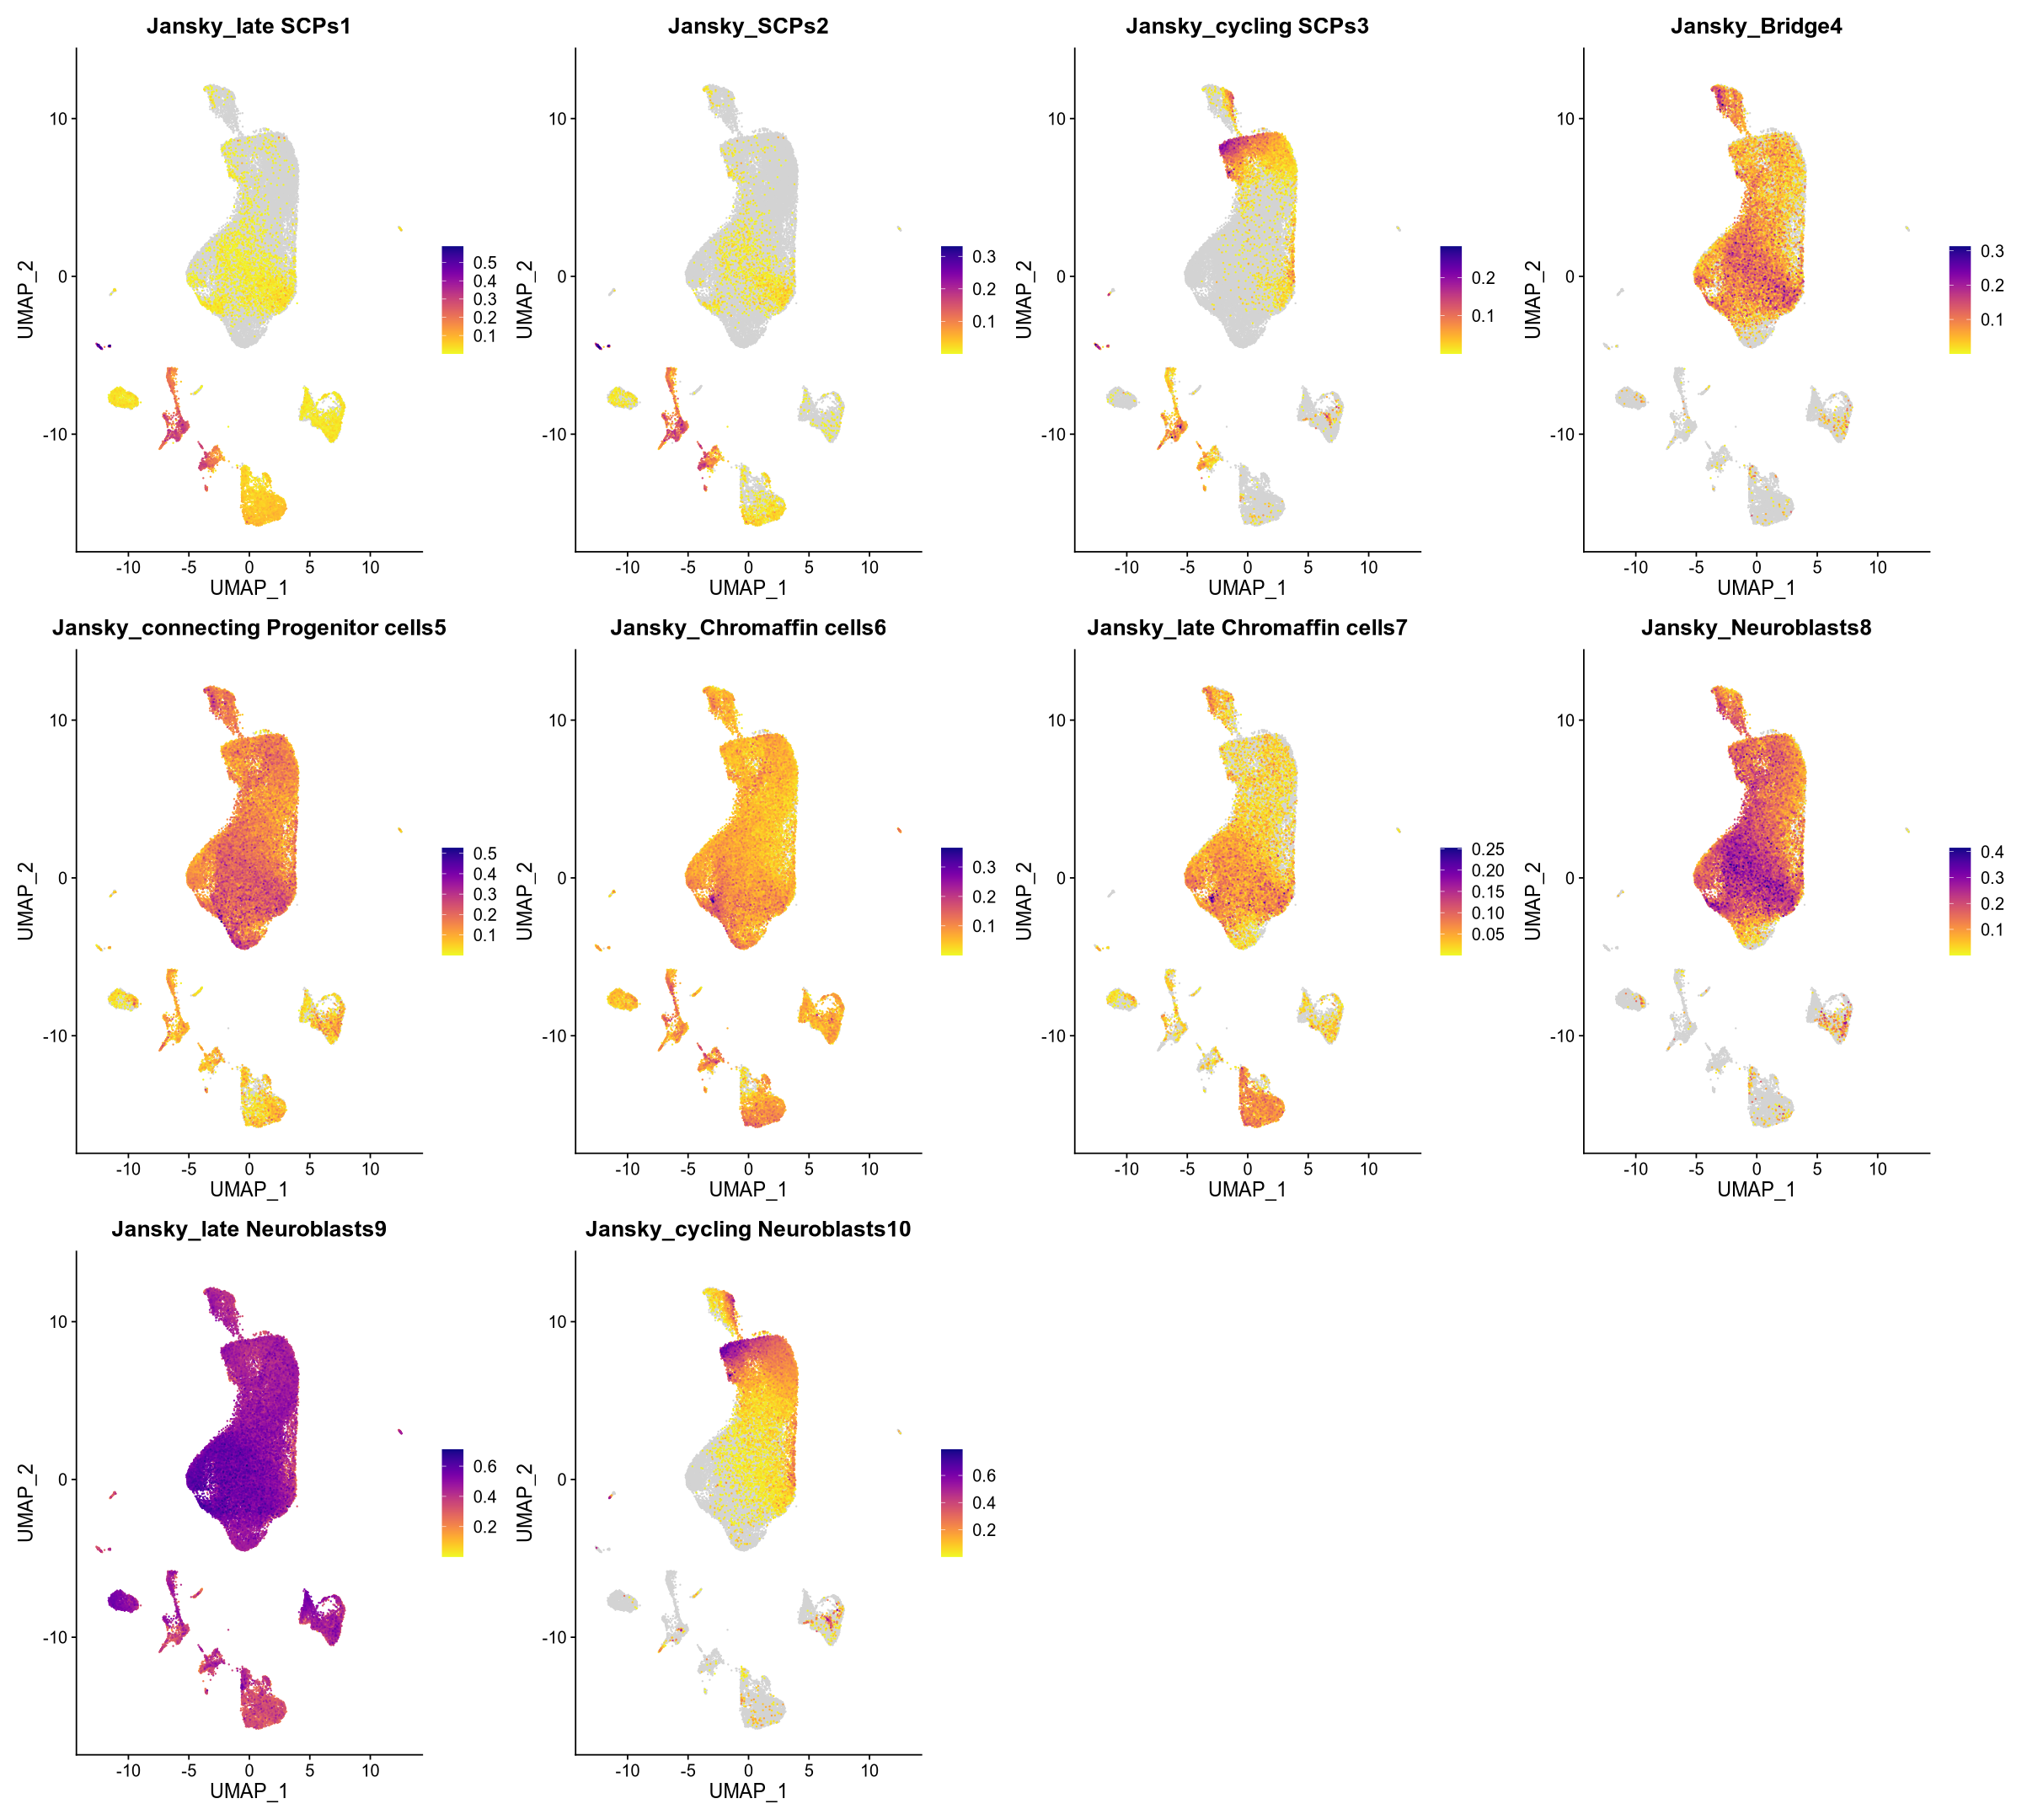

In [15]:
fig.size(18,20)
human_feature_plot = FeaturePlot_scCustom(
    tumor_int_scores, 
    reduction = "umap", 
    features = signature_columns)
human_feature_plot

### Mouse data

In [17]:
jensky_signature$mouse_genes = str_to_title(jensky_signature$gene)

In [18]:
gene_sets = split(jensky_signature$mouse_genes, jensky_signature$cluster)

In [20]:
homo_copy_score = AddModuleScore(
        object = homo,
        features = gene_sets[jensky_signature$cluster %>% unique],
    name = paste0('Jansky_',jensky_signature$cluster %>% unique)
    )
 

Warning message:
“The following features are not present in the object: Abca8, Rp11-308n19.1, Rp11-242p2.1, Nr2f2-As1, Gpr126, Qki, Aqp4-As1, Rp11-776h12.1, Kiaa1217, Linc00478, C10orf11, Ppap2a, Ctd-3088g3.8, Rp11-436k8.1, Znf536, Wbscr17, Cyp27c1, Nlgn4x, Rp11-141m1.3, Znf804b, Casc15, Fam134b, Rp11-366l20.2, C4orf19, Garem, Rp11-307p5.1, Hes4, Gpr98, Mir181a1hg, Leprel1, not searching for symbol synonyms”
Warning message:
“The following features are not present in the object: Rp11-152k4.2, Qki, Gpr126, Casc15, Nr2f2-As1, Rp11-436k8.1, Rp11-366l20.2, Rp11-776h12.1, Vcan-As1, Kiaa1755, Rp11-413b19.2, Ac090673.2, Sgk223, Abca8, Rp11-366l20.3, Cyp27c1, Garem, Mir181a1hg, Gng12-As1, Znf536, Ppap2a, Kiaa1217, C4orf19, Linc00478, Rp11-945c19.4, C3orf70, Aqp4-As1, Ac008937.2, Znf521, Fbn3, Ctd-3088g3.8, Rp11-649g15.2, Rp11-696n14.1, Rp11-444d3.1, Ctd-2647l4.1, Arhgef35, Erbb2ip, Mir181a2hg, Rp11-37b2.1, Lphn2, Linc01057, C10orf11, Kiaa0922, Mef2c-As1, Rp11-242p2.1, Rp11-141m1.3, Rp11-123o10

Warning message:
“Some of the plotted features are from meta.data slot.
• Please check that `na_cutoff` param is being set appropriately for those features.”


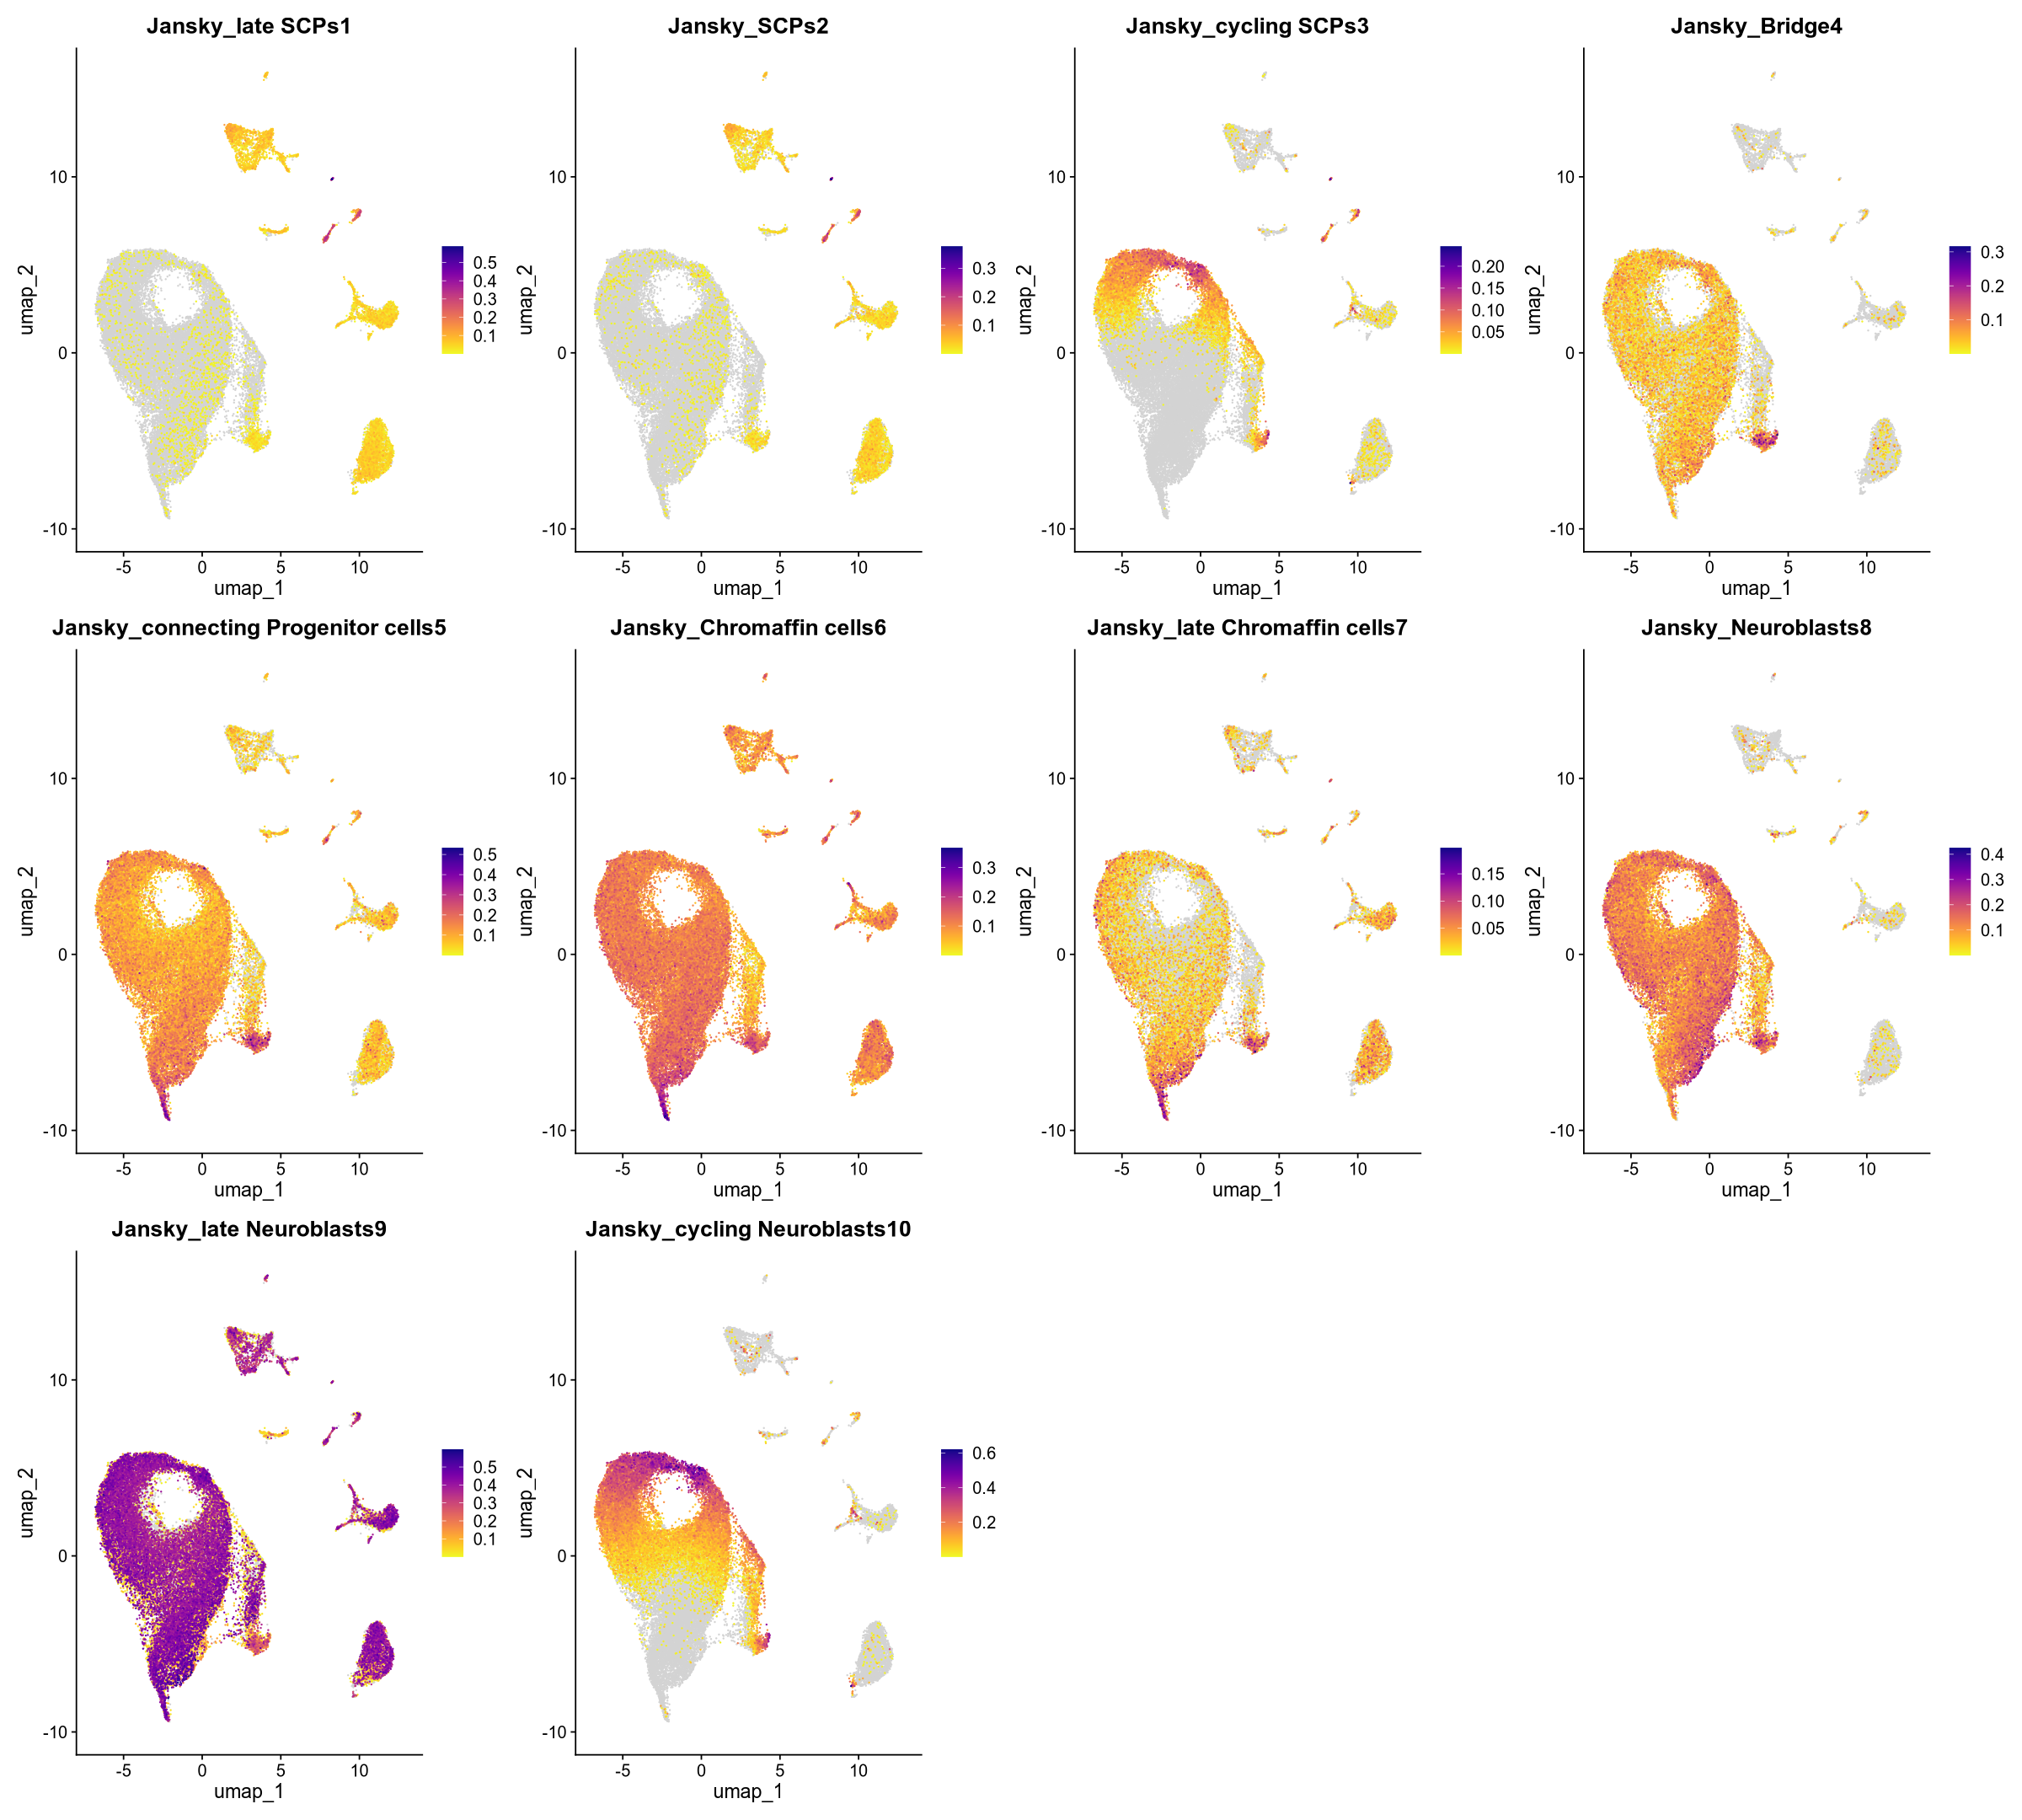

In [21]:
homo_feature_plot = FeaturePlot_scCustom(
    homo_copy_score, 
    reduction = "umap", 
    features = signature_columns)
homo_feature_plot

In [22]:
hemi_copy_score = AddModuleScore(
        object = hemi,
        features = gene_sets[jensky_signature$cluster %>% unique],
    name = paste0('Jansky_',jensky_signature$cluster %>% unique)
    )

Warning message:
“The following features are not present in the object: Abca8, Rp11-308n19.1, Rp11-242p2.1, Nr2f2-As1, Gpr126, Qki, Aqp4-As1, Rp11-776h12.1, Kiaa1217, Linc00478, C10orf11, Ppap2a, Ctd-3088g3.8, Rp11-436k8.1, Znf536, Wbscr17, Cyp27c1, Nlgn4x, Rp11-141m1.3, Znf804b, Casc15, Fam134b, Rp11-366l20.2, C4orf19, Garem, Rp11-307p5.1, Hes4, Gpr98, Mir181a1hg, Leprel1, not searching for symbol synonyms”
Warning message:
“The following features are not present in the object: Rp11-152k4.2, Qki, Gpr126, Casc15, Nr2f2-As1, Rp11-436k8.1, Rp11-366l20.2, Rp11-776h12.1, Vcan-As1, Kiaa1755, Rp11-413b19.2, Ac090673.2, Sgk223, Abca8, Rp11-366l20.3, Cyp27c1, Garem, Mir181a1hg, Gng12-As1, Znf536, Ppap2a, Kiaa1217, C4orf19, Linc00478, Rp11-945c19.4, C3orf70, Aqp4-As1, Ac008937.2, Znf521, Fbn3, Ctd-3088g3.8, Rp11-649g15.2, Rp11-696n14.1, Rp11-444d3.1, Ctd-2647l4.1, Arhgef35, Erbb2ip, Mir181a2hg, Rp11-37b2.1, Lphn2, Linc01057, C10orf11, Kiaa0922, Mef2c-As1, Rp11-242p2.1, Rp11-141m1.3, Rp11-123o10

Warning message:
“Some of the plotted features are from meta.data slot.
• Please check that `na_cutoff` param is being set appropriately for those features.”


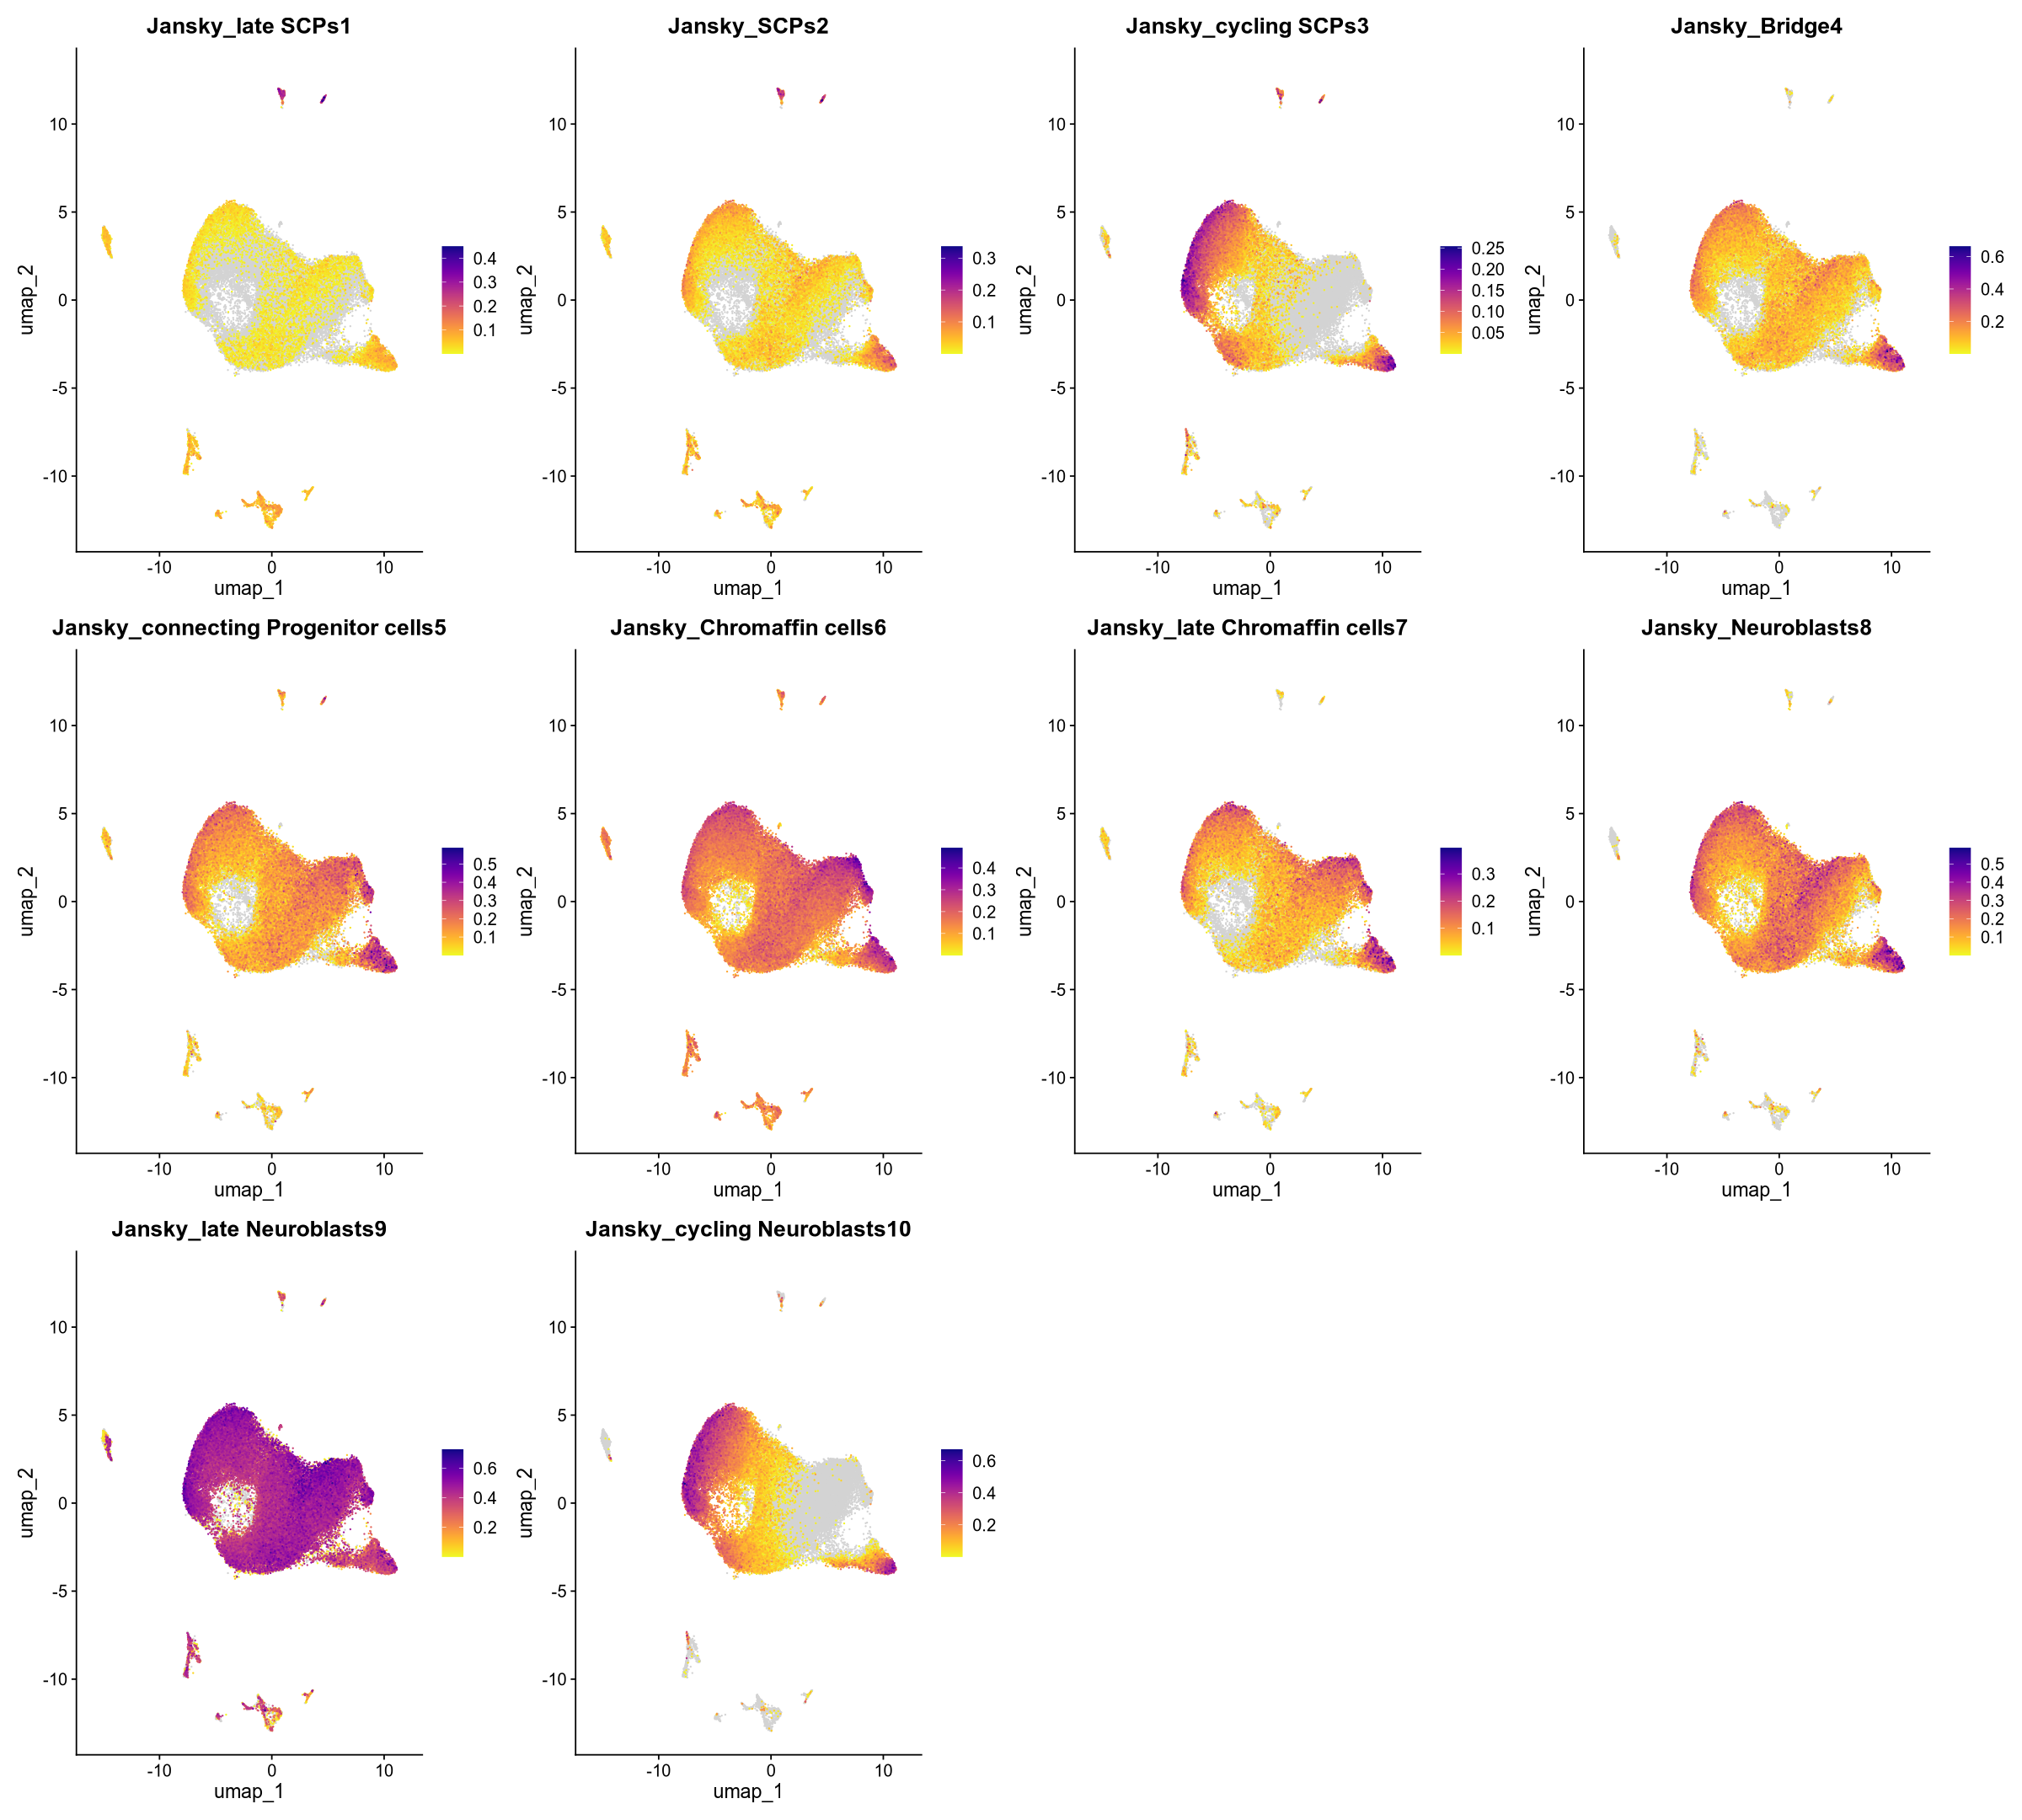

In [23]:
hemi_feature_plot = FeaturePlot_scCustom(
    hemi_copy_score, 
    reduction = "umap", 
    features = signature_columns)
hemi_feature_plot